In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score,f1_score, roc_auc_score, log_loss

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load dataset
juice = pd.read_csv("OJ.csv")
juice.head(20)

,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
5,6,CH,230,7,1.69,1.99,0.00,0.00,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0
6,7,CH,232,7,1.69,1.99,0.00,0.40,1,1,0.972182,1.59,1.69,-0.10,Yes,0.201005,0.000000,0.30,0
7,8,CH,234,7,1.75,1.99,0.00,0.40,1,0,0.977746,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0
8,9,CH,235,7,1.75,1.99,0.00,0.40,0,0,0.982197,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0
9,10,CH,238,7,1.75,1.99,0.00,0.40,0,0,0.985757,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0


In [3]:
juice.describe()

,Unnamed: 0,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,535.500000,254.381308,3.959813,1.867421,2.085411,0.051860,0.123364,0.147664,0.161682,0.565782,1.962047,1.815561,0.146486,0.059298,0.027314,0.217991,1.630841
std,309.026698,15.558286,2.308984,0.101970,0.134386,0.117474,0.213834,0.354932,0.368331,0.307843,0.252697,0.143384,0.271563,0.101760,0.062232,0.107535,1.430387
min,1.000000,227.000000,1.000000,1.690000,1.690000,0.000000,0.000000,0.000000,0.000000,0.000011,1.190000,1.390000,-0.670000,0.000000,0.000000,0.000000,0.000000
25%,268.250000,240.000000,2.000000,1.790000,1.990000,0.000000,0.000000,0.000000,0.000000,0.325257,1.690000,1.750000,0.000000,0.000000,0.000000,0.140000,0.000000
50%,535.500000,257.000000,3.000000,1.860000,2.090000,0.000000,0.000000,0.000000,0.000000,0.600000,2.090000,1.860000,0.230000,0.000000,0.000000,0.240000,2.000000
75%,802.750000,268.000000,7.000000,1.990000,2.180000,0.000000,0.230000,0.000000,0.000000,0.850873,2.130000,1.890000,0.320000,0.112676,0.000000,0.300000,3.000000
max,1070.000000,278.000000,7.000000,2.090000,2.290000,0.500000,0.800000,1.000000,1.000000,0.999947,2.290000,2.090000,0.640000,0.402010,0.252688,0.440000,4.000000


In [4]:
juice_df = pd.DataFrame(juice)
pd.crosstab(juice_df.STORE,juice_df.StoreID)

StoreID,1,2,3,4,7
STORE,,,,,
0,0,0,0,0,356
1,157,0,0,0,0
2,0,222,0,0,0
3,0,0,196,0,0
4,0,0,0,139,0


In [5]:
juice_df = juice_df.drop(['Unnamed: 0','STORE','Store7'], axis = 1)

In [6]:
# Convert Purchase to integer values. CH = 0 and MM = 1
juice_df['Purchase'] = juice_df['Purchase'].replace({"CH":0,"MM":1})
juice_df['Purchase'] = juice_df['Purchase'].apply(bool)

In [7]:
# Convert StoreID to categorical value
juice_df['StoreID'] = juice_df['StoreID'].apply(str)
juice_df['WeekofPurchase'] = juice_df['WeekofPurchase'].apply(str)

In [8]:
# Min Max Scaling
scaler = MinMaxScaler()

juice_df[['PriceCH','PriceMM','DiscCH','DiscMM',
          'LoyalCH','SalePriceMM','SalePriceCH','PriceDiff','PctDiscMM','PctDiscCH',
          'ListPriceDiff']] = scaler.fit_transform(juice_df[['PriceCH','PriceMM','DiscCH',
                                                        'DiscMM','LoyalCH','SalePriceMM','SalePriceCH','PriceDiff',
                                                        'PctDiscMM','PctDiscCH','ListPriceDiff']])

In [9]:
# Resort columns
juice_df = juice_df[['WeekofPurchase','StoreID','PriceCH','PriceMM','DiscCH','DiscMM','SpecialCH','SpecialMM','LoyalCH','SalePriceMM','SalePriceCH','PriceDiff','PctDiscMM','PctDiscCH','ListPriceDiff','Purchase']]

Text(0.5, 1.0, 'Multi-Collinearity of OJ attributes')

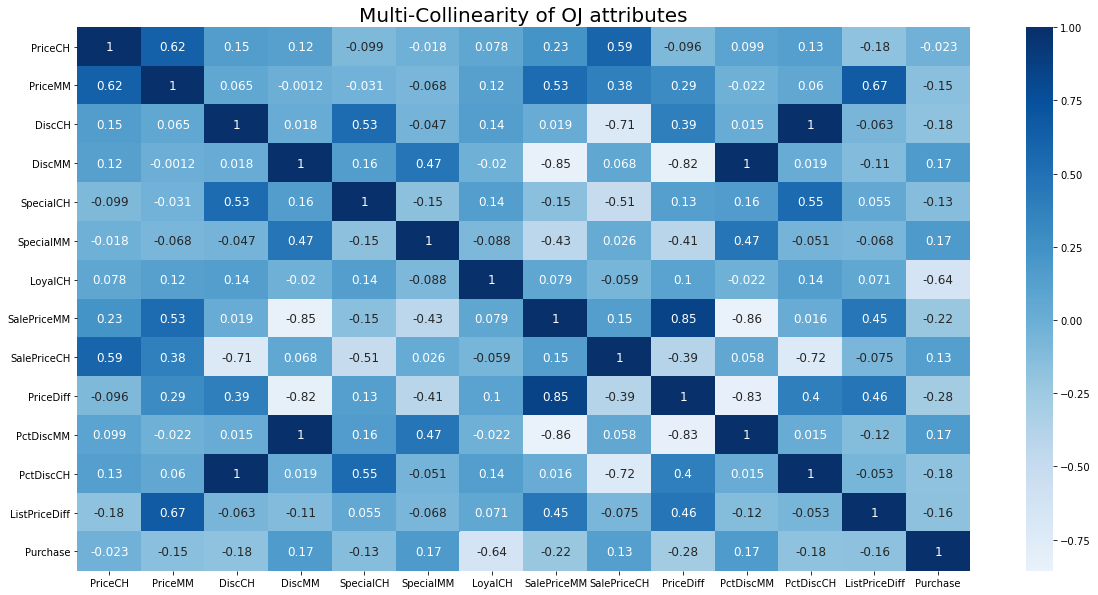

In [10]:
# Feature selection
fig, ax = plt.subplots(figsize=(20,10))
cor = juice_df.corr()
sns.heatmap(cor, center=0, cmap = 'Blues', annot = True, annot_kws={"size": 12})
ax.set_title('Multi-Collinearity of OJ attributes', fontsize=20)

In [11]:
# One Hot Encoding of StoreID attribute
store_columns = ["StoreID"]
juice_df = pd.get_dummies(juice_df, prefix_sep="_", columns = store_columns)
juice_df.head(5)

,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,Purchase,StoreID_1,StoreID_2,StoreID_3,StoreID_4,StoreID_7
0,237,0.150,0.500000,0.00,0.000,0,0,0.500021,0.727273,0.514286,0.694656,0.000000,0.000000,0.545455,False,1,0,0,0,0
1,239,0.150,0.500000,0.00,0.375,0,1,0.600027,0.454545,0.514286,0.465649,0.375001,0.000000,0.545455,False,1,0,0,0,0
2,245,0.425,0.666667,0.34,0.000,0,0,0.680033,0.818182,0.428571,0.816794,0.000000,0.361703,0.522727,False,1,0,0,0,0
3,227,0.000,0.000000,0.00,0.000,0,0,0.400015,0.454545,0.428571,0.511450,0.000000,0.000000,0.000000,True,1,0,0,0,0
4,228,0.000,0.000000,0.00,0.000,0,0,0.956585,0.454545,0.428571,0.511450,0.000000,0.000000,0.000000,False,0,0,0,0,1


In [12]:
# One Hot Encoding of WeekofPurchase attribute
purchase_columns = ["WeekofPurchase"]
juice_df = pd.get_dummies(juice_df, prefix_sep="_", columns = purchase_columns)
juice_df.head(5)

,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,...,WeekofPurchase_269,WeekofPurchase_270,WeekofPurchase_271,WeekofPurchase_272,WeekofPurchase_273,WeekofPurchase_274,WeekofPurchase_275,WeekofPurchase_276,WeekofPurchase_277,WeekofPurchase_278
0,0.150,0.500000,0.00,0.000,0,0,0.500021,0.727273,0.514286,0.694656,...,0,0,0,0,0,0,0,0,0,0
1,0.150,0.500000,0.00,0.375,0,1,0.600027,0.454545,0.514286,0.465649,...,0,0,0,0,0,0,0,0,0,0
2,0.425,0.666667,0.34,0.000,0,0,0.680033,0.818182,0.428571,0.816794,...,0,0,0,0,0,0,0,0,0,0
3,0.000,0.000000,0.00,0.000,0,0,0.400015,0.454545,0.428571,0.511450,...,0,0,0,0,0,0,0,0,0,0
4,0.000,0.000000,0.00,0.000,0,0,0.956585,0.454545,0.428571,0.511450,...,0,0,0,0,0,0,0,0,0,0


In [13]:
juice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 71 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PriceCH             1070 non-null   float64
 1   PriceMM             1070 non-null   float64
 2   DiscCH              1070 non-null   float64
 3   DiscMM              1070 non-null   float64
 4   SpecialCH           1070 non-null   int64  
 5   SpecialMM           1070 non-null   int64  
 6   LoyalCH             1070 non-null   float64
 7   SalePriceMM         1070 non-null   float64
 8   SalePriceCH         1070 non-null   float64
 9   PriceDiff           1070 non-null   float64
 10  PctDiscMM           1070 non-null   float64
 11  PctDiscCH           1070 non-null   float64
 12  ListPriceDiff       1070 non-null   float64
 13  Purchase            1070 non-null   bool   
 14  StoreID_1           1070 non-null   uint8  
 15  StoreID_2           1070 non-null   uint8  
 16  StoreI

In [14]:
# Reorder columns - send Purchase to the end as it is the target variable
juice_df = juice_df[['PriceCH','PriceMM','DiscCH','DiscMM','SpecialCH','SpecialMM','LoyalCH','SalePriceMM','SalePriceCH',
                     'PriceDiff','PctDiscMM','PctDiscCH','ListPriceDiff','WeekofPurchase_227','WeekofPurchase_228',
                     'WeekofPurchase_229','WeekofPurchase_230','WeekofPurchase_231','WeekofPurchase_232','WeekofPurchase_233',
                     'WeekofPurchase_234','WeekofPurchase_235','WeekofPurchase_236','WeekofPurchase_237','WeekofPurchase_238',
                     'WeekofPurchase_239','WeekofPurchase_240','WeekofPurchase_241','WeekofPurchase_242','WeekofPurchase_243',
                     'WeekofPurchase_244','WeekofPurchase_245','WeekofPurchase_246','WeekofPurchase_247','WeekofPurchase_248',
                     'WeekofPurchase_249','WeekofPurchase_250','WeekofPurchase_251','WeekofPurchase_252','WeekofPurchase_253',
                     'WeekofPurchase_254','WeekofPurchase_255','WeekofPurchase_256','WeekofPurchase_257','WeekofPurchase_258',
                     'WeekofPurchase_259','WeekofPurchase_260','WeekofPurchase_261','WeekofPurchase_262','WeekofPurchase_263',
                     'WeekofPurchase_264','WeekofPurchase_265','WeekofPurchase_266','WeekofPurchase_267','WeekofPurchase_268',
                     'WeekofPurchase_269','WeekofPurchase_270','WeekofPurchase_271','WeekofPurchase_272','WeekofPurchase_273',
                     'WeekofPurchase_274','WeekofPurchase_275','WeekofPurchase_276','WeekofPurchase_277','WeekofPurchase_278',
                     'StoreID_1','StoreID_2','StoreID_3','StoreID_4','StoreID_7','Purchase']]


In [15]:
# Final features
df_juice_final_features = juice_df.drop(['PctDiscCH','PctDiscMM','SalePriceCH','SalePriceMM'],1)

## Split Train-Test

In [16]:
# Splitting data train-test (70-30)
X = df_juice_final_features.iloc[:,0:-1] #get all features except last feature; col 0 to 70
y = df_juice_final_features.iloc[:,-1] #get last feature, the target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(749, 66)
(749,)
(321, 66)
(321,)


## Decision Tree

In [17]:
# Decision Tree + Grid Seach Tuning
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

treeclf = DecisionTreeClassifier(splitter='best', presort=True, class_weight=None, random_state=42)
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[2, 4, 6, 8, 10], 'min_samples_split':[2, 10, 50], 'min_samples_leaf':[1, 5, 10],
             'max_features':[None, 'auto'], 'max_leaf_nodes':[None, 5, 10, 50], 'min_impurity_decrease':[0, 0.1, 0.2]}
cv_clf = GridSearchCV(treeclf, parameters, scoring='roc_auc', cv=5, return_train_score=True)
%time cv_clf.fit(X, y)

cv_clf.best_params_
cv_clf.best_score_
cv_clf.best_estimator_

CPU times: user 56.1 s, sys: 288 ms, total: 56.4 s
Wall time: 56.4 s


DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=50,
                       min_impurity_decrease=0, min_samples_leaf=10,
                       min_samples_split=50, presort=True, random_state=42)

In [18]:
# Decision Tree results after tuning
clf = DecisionTreeClassifier(random_state=42, criterion="entropy",
                             min_samples_split=50, min_samples_leaf=10, max_depth=6, max_leaf_nodes=None)
clf.fit(X_train, y_train)

y_pred_dt = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("DT Accuracy = {:.4f}".format(accuracy_score(y_test, y_pred_dt)))
print("DT Precision = {:.4f}".format(precision_score(y_test, y_pred_dt)))
print("DT Recall = {:.4f}".format(recall_score(y_test, y_pred_dt)))
print("DT F1 Score = {:.4f}".format(f1_score(y_test, y_pred_dt)))
print("DT Log loss = {:.4f}".format(log_loss(y_test, y_pred_dt)))
print("DT AUC = {:.4f}".format(roc_auc_score(y_test, y_pred_dt)))

[[175  18]
 [ 52  76]]
              precision    recall  f1-score   support

       False       0.77      0.91      0.83       193
        True       0.81      0.59      0.68       128

    accuracy                           0.78       321
   macro avg       0.79      0.75      0.76       321
weighted avg       0.79      0.78      0.77       321

DT Accuracy = 0.7819
DT Precision = 0.8085
DT Recall = 0.5938
DT F1 Score = 0.6847
DT Log loss = 7.5319
DT AUC = 0.7502


## Logistic Regression

In [19]:
# Logistic Regression + Grid Search tuning
clf = LogisticRegression()

grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)

print(grid_clf_acc.best_estimator_)

y_pred_acc = grid_clf_acc.predict(X_test)

print(confusion_matrix(y_test, y_pred_acc))
print(classification_report(y_test, y_pred_acc))
print("LR Accuracy = {:.4f}".format(accuracy_score(y_test, y_pred_acc)))
print("LR Precision = {:.4f}".format(precision_score(y_test, y_pred_acc)))
print("LR Recall = {:.4f}".format(recall_score(y_test, y_pred_acc)))
print("LR F1 Score = {:.4f}".format(f1_score(y_test, y_pred_acc)))
print("LR Log loss = {:.4f}".format(log_loss(y_test, y_pred_acc)))
print("LR AUC = {:.4f}".format(roc_auc_score(y_test, y_pred_acc)))

LogisticRegression(C=1)
[[170  23]
 [ 40  88]]
              precision    recall  f1-score   support

       False       0.81      0.88      0.84       193
        True       0.79      0.69      0.74       128

    accuracy                           0.80       321
   macro avg       0.80      0.78      0.79       321
weighted avg       0.80      0.80      0.80       321

LR Accuracy = 0.8037
LR Precision = 0.7928
LR Recall = 0.6875
LR F1 Score = 0.7364
LR Log loss = 6.7787
LR AUC = 0.7842


## KNN

In [20]:
k_range = list(range(1,10))
p_range = list(range(1,3))

weight_options = ["uniform", "distance"]
metric_options = ["euclidean","minkowski"]
param_grid = dict(n_neighbors = k_range, p = p_range, weights = weight_options, metric = metric_options)

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X,y)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.7700934579439253
{'metric': 'euclidean', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
KNeighborsClassifier(metric='euclidean', n_neighbors=9, p=1)


In [21]:
# Train KNN model using the best K value (9)
n_neighbors = 9
p_options = 2
metric_option = 'euclidean' 
KNN_classifier = KNeighborsClassifier(n_neighbors=n_neighbors,p=p_options,metric=metric_option)

KNN_classifier.fit(X_train, y_train)

y_pred_knn = KNN_classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print("KNN Accuracy = {:.4f}".format(accuracy_score(y_test, y_pred_knn)))
print("KNN Precision = {:.4f}".format(precision_score(y_test, y_pred_knn)))
print("KNN Recall = {:.4f}".format(recall_score(y_test, y_pred_knn)))
print("KNN F1 Score = {:.4f}".format(f1_score(y_test, y_pred_knn)))
print("KNN Log loss = {:.4f}".format(log_loss(y_test, y_pred_knn)))
print("KNN AUC = {:.4f}".format(roc_auc_score(y_test, y_pred_knn)))


[[165  28]
 [ 46  82]]
              precision    recall  f1-score   support

       False       0.78      0.85      0.82       193
        True       0.75      0.64      0.69       128

    accuracy                           0.77       321
   macro avg       0.76      0.75      0.75       321
weighted avg       0.77      0.77      0.77       321

KNN Accuracy = 0.7695
KNN Precision = 0.7455
KNN Recall = 0.6406
KNN F1 Score = 0.6891
KNN Log loss = 7.9623
KNN AUC = 0.7478


## Random Forest

In [22]:
rfc=RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [200, 400, 600],
              'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,5,6,7,8,10],
              'criterion' :['gini', 'entropy']}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [23]:
# Random Forest model performance using best parameters
rfc1 = RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 200, max_depth=8, criterion='gini')
rfc1.fit(X_train, y_train)

y_pred_rfc = rfc1.predict(X_test)

print(confusion_matrix(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))
print("RFC Accuracy = {:.4f}".format(accuracy_score(y_test, y_pred_rfc)))
print("RFC Precision = {:.4f}".format(precision_score(y_test, y_pred_rfc)))
print("RFC Recall = {:.4f}".format(recall_score(y_test, y_pred_rfc)))
print("RFC F1 Score = {:.4f}".format(f1_score(y_test, y_pred_rfc)))
print("RFC Log loss = {:.4f}".format(log_loss(y_test, y_pred_rfc)))
print("RFC AUC = {:.4f}".format(roc_auc_score(y_test, y_pred_rfc)))

[[166  27]
 [ 42  86]]
              precision    recall  f1-score   support

       False       0.80      0.86      0.83       193
        True       0.76      0.67      0.71       128

    accuracy                           0.79       321
   macro avg       0.78      0.77      0.77       321
weighted avg       0.78      0.79      0.78       321

RFC Accuracy = 0.7850
RFC Precision = 0.7611
RFC Recall = 0.6719
RFC F1 Score = 0.7137
RFC Log loss = 7.4243
RFC AUC = 0.7660


## SVM

In [24]:
svm = SVC()
parameters_svm = {'kernel':('linear', 'rbf'), 'C':(1,0.25,0.5,0.75),'gamma': (0.001, 0.01, 0.1, 1,2,3,'auto')}
clf_svm = GridSearchCV(svm, parameters_svm)

clf_svm.fit(X_train, y_train) 

print(clf_svm.best_params_)
print(clf_svm.best_estimator_) 


{'C': 0.75, 'gamma': 0.001, 'kernel': 'linear'}
SVC(C=0.75, gamma=0.001, kernel='linear')


In [25]:
y_pred_svm = clf_svm.predict(X_test)

print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("SVM Accuracy = {:.4f}".format(accuracy_score(y_test, y_pred_svm)))
print("SVM Precision = {:.4f}".format(precision_score(y_test, y_pred_svm)))
print("SVM Recall = {:.4f}".format(recall_score(y_test, y_pred_svm)))
print("SVM F1 Score = {:.4f}".format(f1_score(y_test, y_pred_svm)))
print("SVM Log loss = {:.4f}".format(log_loss(y_test, y_pred_svm)))
print("SVM AUC = {:.4f}".format(roc_auc_score(y_test, y_pred_svm)))

[[161  32]
 [ 40  88]]
              precision    recall  f1-score   support

       False       0.80      0.83      0.82       193
        True       0.73      0.69      0.71       128

    accuracy                           0.78       321
   macro avg       0.77      0.76      0.76       321
weighted avg       0.77      0.78      0.77       321

SVM Accuracy = 0.7757
SVM Precision = 0.7333
SVM Recall = 0.6875
SVM F1 Score = 0.7097
SVM Log loss = 7.7471
SVM AUC = 0.7608
